In [2]:
import numpy as np
from scipy import optimize
data = {'Fe2+/Fe3+': 3 + 0.5*np.random.rand(5), 
       'Ni+/Ni2+': 2.5 + 0.3*np.random.rand(6),
       'Mo3+/Mo6+': 5 + 0.6*np.random.rand(20)}

In [3]:
data

{'Fe2+/Fe3+': array([3.06661112, 3.04563037, 3.13762942, 3.02571441, 3.29834819]),
 'Mo3+/Mo6+': array([5.12700703, 5.50580413, 5.31131817, 5.10261627, 5.49345693,
        5.48924409, 5.04705783, 5.1138715 , 5.16387572, 5.4708192 ,
        5.2845949 , 5.34453187, 5.14853128, 5.23297091, 5.2513268 ,
        5.0287959 , 5.12951514, 5.14714398, 5.39637241, 5.40610089]),
 'Ni+/Ni2+': array([2.77611893, 2.79171489, 2.54777354, 2.77875273, 2.59049374,
        2.63348917])}

In [4]:
class LLE:
    def __init__(self, data):
        self.pairs = list(data.keys())
        self.mean = {i: np.mean(data[i]) for i in self.pairs}
        self.data = data
    
    def _log_likelihood(self, sigma):
        _lle = 0
        n = 0
        for i in self.pairs:
            _lle += np.sum(-(self.data[i] - self.mean[i])**2 / 2. / sigma**2)
            n += len(self.data[i])
        _lle += np.log(1./sigma / np.sqrt(2*np.pi)) * n
        return _lle
    
    def direct_estimate(self):
        _variance = 0
        n = 0
        for i in self.pairs:
            _variance += np.sum((self.data[i] - self.mean[i])**2)
            n += len(self.data[i])
        return np.sqrt(_variance / n)
    
    def max_lle(self, sigma0=1):
        fun = lambda x: -self._log_likelihood(x)
        return optimize.minimize(fun, sigma0)
        

In [5]:
lle = LLE(data)

In [6]:
res = lle.max_lle(0.1)
print('Sigma = %.4f' % res.x)

Sigma = 0.1374


In [7]:
lle.direct_estimate()

0.13739834212628022

Text(0,0.5,'LLE')

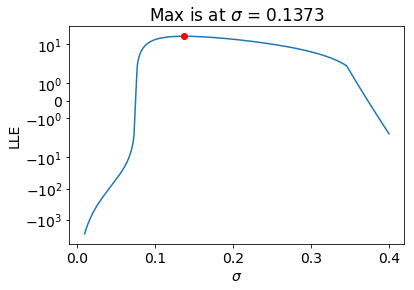

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6, 4))
plt.rcParams['font.size'] = 14
x = np.linspace(0.01, 0.4, 1000)
y = [lle._log_likelihood(i) for i in x]
plt.plot(x, y)
plt.yscale('symlog')
ind = np.argmax(y)
plt.plot(x[ind], y[ind], 'or')
plt.title('Max is at $\sigma$ = %.4f' % x[ind])
plt.xlabel('$\sigma$')
plt.ylabel('LLE')